## How well do jobs and skills pay for Data Analysts?

#### Methodology

1. Evaluate median salary for top 4 jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
import ast
# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else [])
                    )

In [2]:
df_ind = df[df['job_country']=='India'].dropna(subset=['salary_year_avg'])

In [8]:
job_titles = df_ind['job_title_short'].value_counts().index[:4].to_list()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer']

In [9]:
df_ind_top = df_ind[df_ind['job_title_short'].isin(job_titles)]


In [14]:
top_titles = df_ind_top.groupby('job_title_short')['salary_year_avg'].agg('median').sort_values(ascending=False).index.to_list()

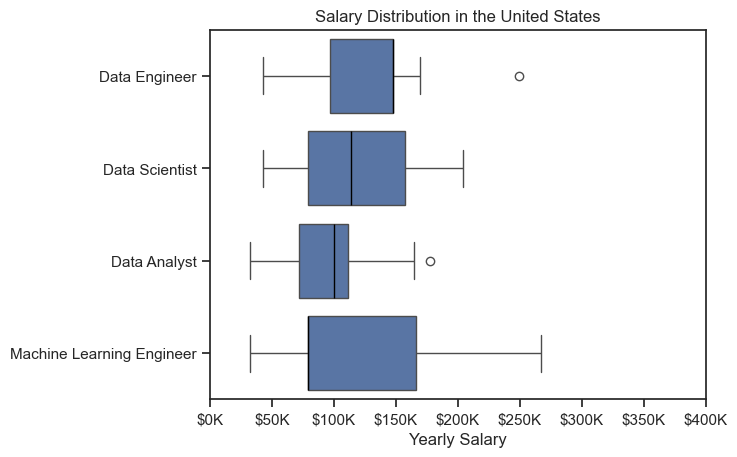

In [21]:
sns.set_theme(style='ticks')
sns.boxplot(data=df_ind_top, 
            x='salary_year_avg', 
            y='job_title_short', 
            order= top_titles, 
            medianprops={'color':'black', 'linewidth':1})
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary')
plt.ylabel('')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax.set_xlim(0,400000)
plt.show()

### Investigate Median Salary vs Skill for Data Analysts

In [23]:
df_DA_ind = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()

df_DA_ind = df_DA_ind.dropna(subset = ['salary_year_avg'])

In [ ]:
df_DA_ind_exploded = df_DA_ind.explode('job_skills')

In [27]:
df_DA_Tpay = (df_DA_ind_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
              .sort_values(by='median', ascending=False)
                )

In [ ]:
df_DA_Tpay =df_DA_Tpay.head(10)

In [35]:
df_DA_Tskill = (df_DA_ind_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
              .sort_values(by='count', ascending=False)
                )
df_DA_Tskill = df_DA_Tskill.head(10).sort_values(by='median', ascending=False)


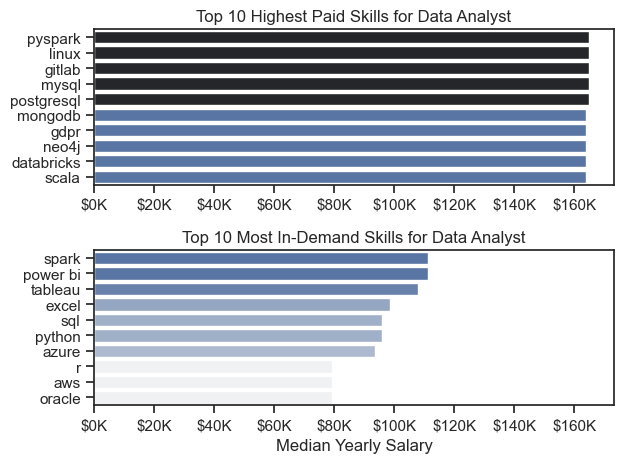

In [36]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style = 'ticks')

sns.barplot(data = df_DA_Tpay, x='median', y=df_DA_Tpay.index, ax=ax[0], hue = 'median',legend=False, palette='dark:b_r')


ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))

sns.barplot(data = df_DA_Tskill, x='median', y=df_DA_Tskill.index, ax= ax[1],legend=False, hue='median', palette='light:b')
# df_top_skills[::-1].plot(kind='barh',y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Yearly Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()

### Comparing this visualization with the United States data

In [38]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_dA_US = df_DA_US.dropna(subset = ['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')
df_dist = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_top_pay = df_dist.sort_values(by = 'median', ascending=False).head(10)
df_top_skills = df_dist.sort_values(by = 'count', ascending=False).head(10).sort_values(by = 'median', ascending=False).head(10)

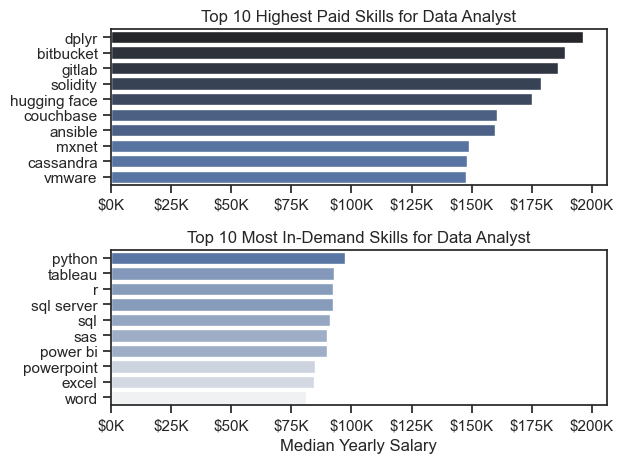

In [39]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style = 'ticks')

sns.barplot(data = df_top_pay, x='median', y=df_top_pay.index, ax=ax[0], hue = 'median',legend=False, palette='dark:b_r')
#df_top_pay.plot(kind='barh',y='median', ax=ax[0], legend=False)

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))

sns.barplot(data = df_top_skills, x='median', y=df_top_skills.index, ax= ax[1],legend=False, hue='median', palette='light:b')
# df_top_skills[::-1].plot(kind='barh',y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Yearly Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()